In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns 
sns.set_palette('Set2')

# Project: (Medical Appointment No-Shows) Data Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we will be analyzing (Medical Appointment No Shows) dataset.
This dataset collects information from 100,000 medical appointments in Brazil and focuses on the question Whether or not patients attend their appointments. There are a number of characteristics about the patientincluded in each row.

## Data Dictionary

1. PatientId: Identification of a patient
2. AppointmentID: Identification of each appointment
3. Gender: Male or Female . 
4. DataMarcacaoConsulta: The day of the actuall appointment, when they have to visit the doctor.
5. DataAgendamento: The day someone called or registered the appointment, this is before appointment of course.
6. Age: How old is the patient.
7. Neighbourhood: Where the appointment takes place.
8. Scholarship:True of False 
9. Hipertension: True or False
10. Diabetes: True or False
11. Alcoholism: True or False
12. Handcap: True or False
13. SMS_received: 1 or more messages sent to the patient.
14. No-show: True or False.



### The questions That we plan on exploring:

- Q1-What is the total number of attendance and non-attendance Patients? and what is the percentage of each group?
- Q2-What is the highest age group for patients?and what is the highest age group for non-attendance?
- Q3-What is the total number of each gender? And what is the percentage of the number?
- Q4-Does Gender affect show up?
- Q5-What is the total number for patients who have received SMS and patients who not received SMS?
- Q6-what is the percentage of the patients who have received SMS and have showed up?
- Q7-How many patients have a scholarship?
- Q8-Are patients on scholarship more committed to their appointments?
- Q9-Are patients who have a scholarship and receive SMS more punctual?
- Q10-Does having physical Diseases such as Hipertension, Diabetes effect on showing up for appointment?




<a id='wrangling'></a>
## Data Wrangling

In [2]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The datasets have 110527 rows and 14 columns.

### Data Cleaning

In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
df.duplicated().sum()

0

**Excellent No missing data or duplicated ones.**

In [7]:
#Delete the columns we don't use
df.drop(['ScheduledDay','AppointmentDay','Neighbourhood','Alcoholism','Handcap','PatientId','AppointmentID'],axis=1,inplace=True)

In [8]:
#Rename some columns
df.rename(columns = {"No-show": "Show","SMS_received":"SMS_sent"}, inplace = True)

In [9]:
#Convert qualitative data into quantitative data to make analyzes more efficient
df.loc[df['Show'] == 'Yes', ['Show']] = 0
df.loc[df['Show'] == 'No', ['Show']] = 1
#Convert data type
df['Show']=df['Show'].astype(int)

In [10]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,SMS_sent,Show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.321026,0.798067
std,23.110205,0.297675,0.397921,0.258265,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From this statistical description we note:
1. the mean ratio for **Show** -show up- is 79% This is a high rate.
2. the **Age** The highest value is 115 and the lowest is -1, age cannot be negative (this value must be deleted).
3. the Average-mean- patients with **Hipertension** is 19%.
4. the Average-mean- patients who has been **SMS_sent** is 32%.

In [11]:
#We noticed that there is only one row
df[df['Age']==-1]

,Gender,Age,Scholarship,Hipertension,Diabetes,SMS_sent,Show
99832,F,-1,0,0,0,0,1


In [12]:
#Delete the negative value
df.drop(index=99832,inplace=True)

In [13]:
#To check to delete the value
df[df['Age']==-1]

,Gender,Age,Scholarship,Hipertension,Diabetes,SMS_sent,Show


Age classification with cut() function to make **Age** more efficient and accurate for visualization and exploration

In [14]:
bins=[0,12,18,35,52,69,115]
df['age_class']=pd.cut(df['Age'],bins)

In [15]:
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,SMS_sent,Show,age_class
0,F,62,0,1,0,0,1,"(52, 69]"
1,M,56,0,0,0,0,1,"(52, 69]"
2,F,62,0,0,0,0,1,"(52, 69]"
3,F,8,0,0,0,0,1,"(0, 12]"
4,F,56,0,1,1,0,1,"(52, 69]"


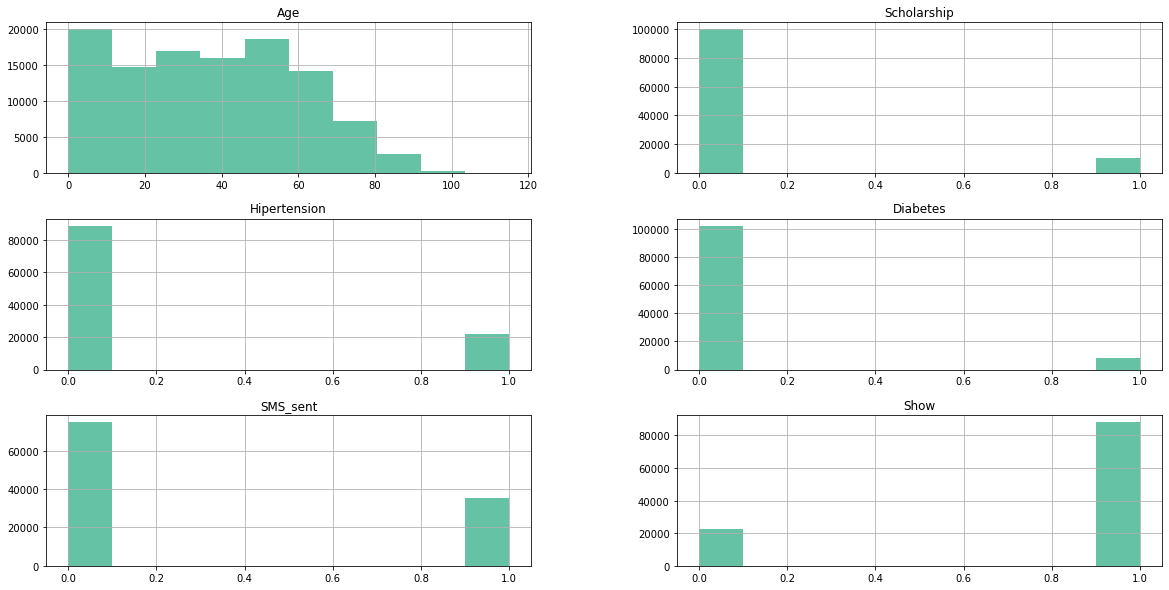

In [16]:
df.hist(figsize=(20,10));

The **Age** right skewed distribution, the mean is typically greater than the median.

### Q1-What is the total number of attendance and non-attendance Patients? and what is the percentage of each group?

In [17]:
did_not_show=df.query('Show==0').Show.count()
show=df.query('Show==1').Show.count()
show,did_not_show

(88207, 22319)

In [18]:
rate_show=round((show/df.shape[0]) * 100,2)
rate_did_not_show=round((did_not_show/df.shape[0])* 100,2)
(rate_show,rate_did_not_show)

(79.81, 20.19)

 attend | count | percentage
-------|-------|-----------
Didn't attend|  22319| 20.19
attend|  88207 | 79.81



We note that 79.8% of patients attended their appointments versus 20.2% who did not.



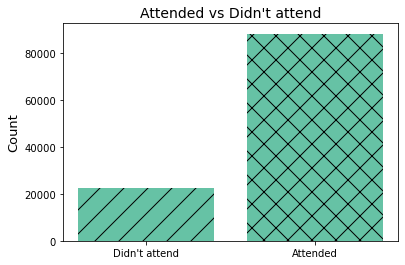

In [19]:
#visualization for Attended vs Didn't attend
locations = np.arange(len(df.Show.value_counts()))
heights = [did_not_show, show]
labels = ['Didn\'t attend','Attended']
bars=plt.bar(locations, heights, tick_label=labels)
bars[0].set_hatch('/')
bars[1].set_hatch('x')
plt.ylabel('Count',fontsize=13)
plt.title('Attended vs Didn\'t attend',fontsize=14);

We note that 88207 of patients attended their appointments versus 22319 who did not.

### Q2-What is the highest age group for patients?and what is the highest age group for non-attendance?

In [20]:
df['age_class'].value_counts()

(35, 52]     25413
(18, 35]     24137
(52, 69]     22813
(0, 12]      17497
(69, 115]     9297
(12, 18]      7830
Name: age_class, dtype: int64

We note that The largest number of patients is in the age group between 35 and 52 years, and the least number of patients is in the age group between 12 to 18 years.

In [21]:
pivot_show_gender=pd.pivot_table(data = df, index = ["age_class"], values = "Show")
round(pivot_show_gender * 100, 2)

,Show
age_class,
"(0, 12]",79.04
"(12, 18]",73.95
"(18, 35]",76.17
"(35, 52]",80.04
"(52, 69]",83.80
"(69, 115]",84.38


We note that the age group between 69 and 115 has a high percentage of attendance times for their appointments. And the age group between 12 and 18 has a lower percentage of times to come to their appointments.The difference between them is 11%.

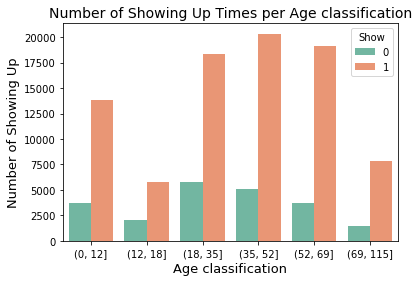

In [22]:
#visualization for Number of Showing Up Times per age group
age_class= sns.countplot(x='age_class', hue='Show', data=df)
plt.title('Number of Showing Up Times per Age classification',fontsize=14)
plt.xlabel('Age classification',fontsize=13)
plt.ylabel('Number of Showing Up',fontsize=13)
plt.show()

We note that the age group between 18 to 69 has a high number of attendance times for their appointments.

### Q3-What is the total number of each gender? And what is the percentage of the number?

In [23]:
#The percentage of females and males
num_male=df.query('Gender=="M"')['Gender'].count()
num_female=df.query('Gender=="F"')['Gender'].count()
rate_female=round((num_female/df.shape[0]) * 100,2)
rate_male=round((num_male/df.shape[0])* 100,2)
print(num_female,",",num_male)
print(rate_female,",",rate_male)

71839 , 38687
65.0 , 35.0


Gender | count | percentage
-------|-------|-----------
female|  71839| 65.0
male|  38687 | 35.0



We note the percentage of females is higher than males by 30%

### Q4-Does Gender affect show up?

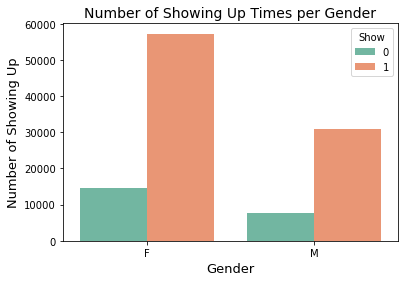

In [24]:
#visualization Number of Showing Up Times per Gender
bars_gender= sns.countplot(x='Gender', hue='Show', data=df)
plt.title('Number of Showing Up Times per Gender',fontsize=14)
plt.xlabel('Gender',fontsize=13)
plt.ylabel('Number of Showing Up',fontsize=13)
plt.show()

The number of females show up is greater than the males. May be because we have more data of females.

In [25]:
pivot_show_gender=pd.pivot_table(data = df, index = ["Gender"], values = "Show")
round(pivot_show_gender * 100, 2)

,Show
Gender,
F,79.69
M,80.03


As we can see here, almost both genders are commited with the same ratio for their appointments. Which is interesting.

### Q5-What is the total number for patients who have received SMS and patients who not received SMS?

In [26]:
#Percentage of patients who received SMS and patients not receive SMS
not_sent=df.query('SMS_sent==0').SMS_sent.count()
sent=df.query('SMS_sent>=1').SMS_sent.count()
rate_not_sent=round((not_sent/df.shape[0]) * 100,2)
rate_sent=round((sent/df.shape[0])* 100,2)
print(rate_not_sent,",",rate_sent)
print(not_sent,",",sent)

67.9 , 32.1
75044 , 35482


 SMS | count | percentage
-------|-------|-----------
received SMS|  35482| 32.1
didn't receive SMS|  75044 | 67.9


We note the percentage of not receive SMS is higher than receive SMS by 35.8%


### Q6-what is the percentage of the patients who have received SMS and have showed up?

In [27]:
pivot_show_sms=pd.pivot_table(data = df, index = ["SMS_sent"], values = "Show")
round(pivot_show_sms * 100, 2)

,Show
SMS_sent,
0,83.30
1,72.43


As we can see here,Patients who received SMS and attended less than those who did not receive SMS and attended.

### Q7- How many patients have a scholarship?

In [28]:
nothave_Schola=df.query('Scholarship==0').Scholarship.count()
have_Schola=df.query('Scholarship==1').Scholarship.count()
nothave_Schola,have_Schola

(99665, 10861)

We note that the number of patients who received a scholarship is 10861 patients

### Q8-Are patients on scholarship more committed to their appointments?

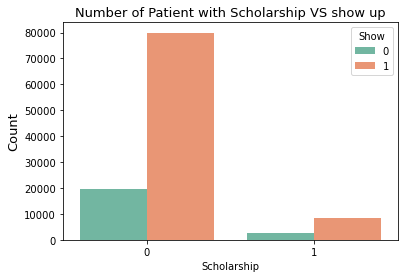

In [29]:
sns.countplot(x='Scholarship', hue='Show', data=df)
plt.title('Number of Patient with Scholarship VS show up',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.show()

The number of patients without a scholarship attending is higher.

In [30]:
pivot_scholarship_sms=pd.pivot_table(data = df, index = ["Scholarship"], values = "Show")
round(pivot_scholarship_sms * 100, 2)

,Show
Scholarship,
0,80.19
1,76.26


We note the patients who have a scholarship less show up 

### Q9- Are patients who have a scholarship and receive SMS more punctual?

In [31]:
pivot_scholarship_sms=pd.pivot_table(data = df, index = ["Scholarship","SMS_sent"], values = "Show")
round(pivot_scholarship_sms * 100, 2)

Show
Scholarship SMS_sent       
0           0         83.54
            1         73.11
1           0         81.05
            1         66.22

As we can see here,Patients who have a scholarship and received SMS less attended.So SMS does not affect their attendance.

### Q10- Does having physical Diseases such as Hipertension, Diabetes effect on showing up for appointment?

In [32]:
diabetes=df.query('Diabetes==1').Diabetes.count()
hipertension=df.query('Hipertension==1').Hipertension.count()
hipertension,diabetes

(21801, 7943)

Diseases | count 
-------|-------
Diabetes|  7943
Hipertension|  21801 




As we can see here,number of Patients with Diabetes is(7943) and Hipertension is (21801) Patients.

In [33]:
pivot_diabetes_hipertension=pd.pivot_table(data = df, index = ['Diabetes','Hipertension'], values = "Show")
round(pivot_diabetes_hipertension * 100, 2)

Show
Diabetes Hipertension       
0        0             79.08
         1             82.82
1        0             80.16
         1             82.41

- We note that Hipertension patients show up more.
- We also note that patients who have diabetes and high Hipertension show up more than patients who only have diabetes

<a id='conclusions'></a>
## Conclusions

- 79.8% of patients attended their appointments versus 20.2% who did not.
- The largest number of patients is in the age group between 35 and 52 years, and the least number of patients is in the age group between 12 to 18 years.
- The age group between 69 and 115 has a high percentage of attendance times for their appointments. And the age group between 12 and 18 has a lower percentage of times to come to their appointments.The difference between them is 11%.
- The percentage of females is higher than males by 30%. and almost both genders are commited with the same ratio for their appointments.
- The percentage of patients didn't receive SMS is higher than receive SMS by 35.8%. and Patients who received SMS and attended less than those who did not receive SMS and attended.
- The patients who have a scholarship less show up, and Patients who have a scholarship and received SMS less attended.
- The number of Patients with Diabetes is (7943) and Hipertension is (21801)Patients.
- We note that Hipertension patients show up more.
- We also note that patients who have diabetes and high Hipertension show up more than patients who only have diabetes.

## Limitations

- The data cover a period of only 3 months, which is a very small sample with respect to the entire year. This missing specific information can lead to an imbalance in the results.
- It will be very useful, if there is a column indicating the average income and level of education.
- It is possible that not all reasons for patients not showing up in this data set, and questionnaire data for patients who missed their appointment can be useful in analyzing their absence.


## Sources

- https://seaborn.pydata.org/generated/seaborn.countplot.html - seaborn website
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html - pandas website
- https://toptipforu.com/how-to-draw-histogram-bar-plot-matplotlib/ - top tip blog
- https://guides.github.com/pdfs/markdown-cheatsheet-online.pdf - MARKDOWN SYNTAX